# Neural network Homework 1  \   Q3_2 - Madaline

In [343]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split

#### We use exactly the povided code as the dataset - just we map the binary labels to 1 and -1

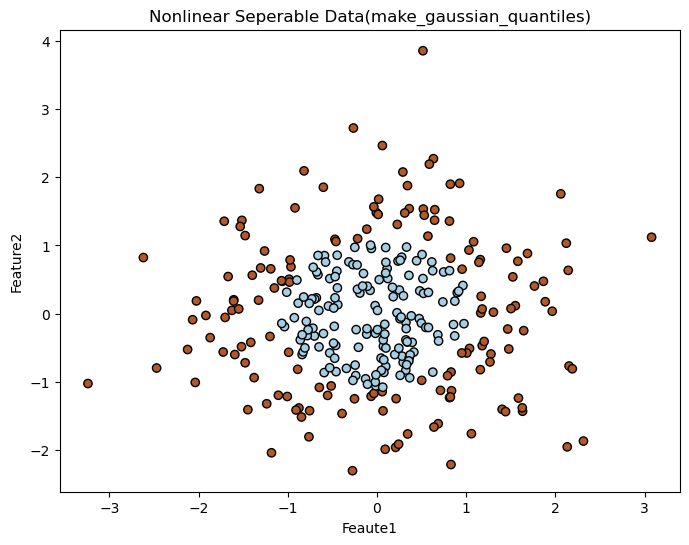

((240, 2), (240,))

In [344]:
np.random.seed(42)
X, y = make_gaussian_quantiles(n_samples = 300, n_features = 2, n_classes =2 , random_state=42)
y=y*2 - 1 #maping labels to 1 and -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, marker= 'o', edgecolors='k')
plt.title('Nonlinear Seperable Data(make_gaussian_quantiles)')
plt.xlabel('Feaute1')
plt.ylabel('Feature2')
plt.show()

y_train
y_test
X.shape, y.shape
X_train.shape, y_train.shape

## Create two dataset

In [345]:
print(y_train)

[-1  1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1
 -1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1
  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1 -1  1
 -1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1
  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1
 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1
  1  1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1  1
  1 -1 -1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1  1  1
  1  1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1]


## Data distribution

In [346]:
class Madaline_MRI:

    def __init__(self, neurons_number, learning_rate=0.1, stop_epoches=200, random_state=5): #5 #3 #8 #9 khobe
        self.random_state = random_state
        self.neurons_number = neurons_number
        self.lr = learning_rate
        self.stop_epoches = stop_epoches

    def f(self, X):
        return np.where(X >= 0, 1, -1)
    
    def prediction_AND_accuracy(self, actual_X, actual_Y):
        predicted = self.predict(actual_X)
        correct_predictions = np.sum(predicted == actual_Y)
        accuracy = (correct_predictions / actual_X.shape[0]) * 100
        return predicted, accuracy
    
    def predict(self, X):
        z_in = np.dot(X, self.w) + self.b1
        z = self.f(z_in)
        y_o = np.dot(z, self.v) + self.b2
        y_predicted = self.f(y_o)
        return y_predicted
    
    def forward(self, X):
        z_in = np.dot(X, self.w) + self.b1
        z = self.f(z_in)
        y_o = np.dot(z, self.v) + self.b2
        y_predicted = self.f(y_o)
        return z_in, z, y_o, y_predicted

    def fit(self, X, y, X_test=None, Y_test=None):
        self.cost_ = []
        self.eval_cost_ = []
        self.accuracy = []
        self.eval_accuracy = []
        first_shape,second_shape=X.shape
        rgen = np.random.RandomState(self.random_state)  # Creating random number generator
        self.w = (rgen.rand(second_shape, self.neurons_number) - 0.6) / 4 #we start our weights from small negative random value
        self.b1 = (rgen.rand(self.neurons_number) - 0.6) / 4  #we start our weights from small negative random value
        self.v = np.ones(self.neurons_number) / self.neurons_number
        self.b2 = (self.neurons_number - 1) / self.neurons_number
        flag = False
        self.epochs = 0

        for self.epochs in range(1, self.stop_epoches):
            flag = False
            for i in range(first_shape):
                # first we calculate forward output
                z_in, _, _, y_predicted = self.forward(X[i])
                if y[i] != y_predicted : #checking if it's wrongly predicted
                    if y[i] == 1 :
                        self.b1[np.argmin(np.abs(z_in))] += self.lr * (1 - z_in[np.argmin(np.abs(z_in))])
                        self.w[:, np.argmin(np.abs(z_in))] += self.lr * (1 - z_in[np.argmin(np.abs(z_in))]) * X[i].T

                    elif y[i] == -1 :
                        positive_index = np.where(0 < z_in)[0]
                        for indices in positive_index:
                            self.b1[indices] += self.lr * (-1 - z_in[indices])
                            self.w[:, indices] += self.lr * (-1 - z_in[indices]) * X[i].T
                    flag = True

            # Forward
            y_predicted = self.predict(X)

            # Loss
            errors = y - y_predicted    
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
            self.accuracy.append(self.prediction_AND_accuracy(X, y)[1])

            if X_test is not None and Y_test is not None:
              # for evaluating on test set
              eval_output = self.predict(X_test)
              eval_errors = Y_test - eval_output
              eval_cost = (eval_errors ** 2).sum() / 2.0
              self.eval_cost_.append(eval_cost)
              self.eval_accuracy.append(self.prediction_AND_accuracy(X_test, Y_test)[1])
              
            if not flag :
                break
            
        return self


numbers_of_neurons=[3, 5, 8] # we want to plot this for 3, 5 and 8 hidden neurons
epoches = [169, 175, 180]
models=dict() #dictionary of all wanted models
for i, neuron in enumerate(numbers_of_neurons):
    models[neuron] = Madaline_MRI(neuron, learning_rate=0.05, stop_epoches = epoches[i], random_state=3)
    models[neuron].fit(X_train, y_train, X_test,  y_test)


models

{3: <__main__.Madaline_MRI at 0x1f57770c890>,
 5: <__main__.Madaline_MRI at 0x1f57f04d150>,
 8: <__main__.Madaline_MRI at 0x1f57713a190>}

In [363]:
def numbers_of_correctly_predicted(X_train, y_train, model):
    predicted_values = model.predict(X_train)
    correcet_predicted=sum(predicted_values==y_train)
    numbers_of_training_set = predicted_values.shape[0]
    print('numbers of correctly predicted in trainset= ',correcet_predicted )
    print('length of selected training dataset = ',numbers_of_training_set ) 
    
numbers_of_neurons=[3, 5, 8] # we want to plot this for 3, 5 and 8 hidden neurons
for n in  numbers_of_neurons:
    print('for %i neurons ----------------------------------------------'%(models[n].neurons_number))
    print(' ')
    print('Elapsed epochs : ', models[n].epochs)
    print('Trainset accuracy of madaline with %i neurons is = '%(models[n].neurons_number) ,models[n].accuracy[-1] )
    print('Testset accuracy of madaline with %i neurons is = '%(models[n].neurons_number) ,models[n].eval_accuracy[-1] )
    numbers_of_correctly_predicted(X_train,y_train, models[n])
    print(' ')

for 3 neurons ----------------------------------------------
 
Elapsed epochs :  168
Trainset accuracy of madaline with 3 neurons is =  92.5
Testset accuracy of madaline with 3 neurons is =  90.0
numbers of correctly predicted in trainset=  222
length of selected training dataset =  240
 
for 5 neurons ----------------------------------------------
 
Elapsed epochs :  174
Trainset accuracy of madaline with 5 neurons is =  98.33333333333333
Testset accuracy of madaline with 5 neurons is =  96.66666666666667
numbers of correctly predicted in trainset=  236
length of selected training dataset =  240
 
for 8 neurons ----------------------------------------------
 
Elapsed epochs :  113
Trainset accuracy of madaline with 8 neurons is =  100.0
Testset accuracy of madaline with 8 neurons is =  93.33333333333333
numbers of correctly predicted in trainset=  240
length of selected training dataset =  240
 


In [364]:
def plot_loss(model):
  fig, ax = plt.subplots(figsize=(5, 4))
  ax.plot(np.arange(1, model.epochs+1, 1), model.cost_[::1], color='green')
  ax.set_title('Madaline training set cost- Learning rate %i , neurons = %i'% (model.lr, model.neurons_number))
  ax.set_xlabel('epochs')
  ax.set_ylabel('loss')
  fig.tight_layout()
  plt.show()

In [365]:
def cost_accuracy_plot(model):
    #index = np.argmax(model.accuracy)
    #cost_ = model.cost_[:index]
    #accuracy = model.accuracy[:index]

    cost_ = model.cost_
    accuracy = model.accuracy

    plt.figure(figsize=(10, 7))  # Adjusts the size of the plot
    # Plotting the sum-squared-error
    sse_line, = plt.plot(range(1, len(cost_) + 1), cost_, color='blue', label='Sum-squared-error')
    plt.xlabel('Epochs')
    plt.ylim(0,150)

    plt.ylabel('Sum-squared-error', color='blue')
    plt.tick_params(axis='y', labelcolor='blue')

    # Creating a secondary y-axis for accuracy
    ax2 = plt.gca().twinx()  # Get current axis and create another y-axis sharing the same x-axis
    acc_line, = ax2.plot(range(1, len(accuracy) + 1), accuracy, color='red', label='Training set accuracy')
    ax2.set_ylabel('Training set accuracy (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.legend(handles=[sse_line, acc_line], loc='center right')

    plt.title('Madaline cost accuracy plots- Learning rate %i , neurons = %i (training_set)'% (model.lr, model.neurons_number))

    # Adding grid for better readability
    plt.grid(True)
    plt.ylim(60,100)
    plt.show()

In [366]:
# testset accuracy plot
def test_cost_accuracy_plts(model):
    # Plotting the cost against the number of epochs
    plt.plot(range(1, len(model.eval_cost_) + 1), model.eval_cost_)
    plt.xlabel('Epochs')
    plt.ylabel('Sum-squared-error')
    plt.title('Madaline Testset plots cost- Learning rate %i , neurons = %i'% (model.lr, model.neurons_number))
    plt.show()

    # Plotting the cost against the number of epochs
    plt.plot(range(1, len(model.eval_accuracy) + 1), model.eval_accuracy, color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('test_set accuracy')
    plt.title('Madaline Testset plots accuracy- Learning rate %i, neurons = %i'% (model.lr, model.neurons_number))
    plt.show()

In [367]:
def decision_boundries(X_train, y_train, model):
    y_train1 = np.array(y_train).copy().flatten()  # This ensures y_train is one-dimensional
    colors = ['blue', 'green']

    plt.figure(figsize=(7, 8))
    class_labels = [1, -1]
    for i,target_name in enumerate(class_labels):
        # Select rows where the class label matches target_name
        X_filtered = X_train[y_train1 == target_name]
        # Plot these rows, using the first and second columns for x and y coordinates, respectively
        plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=colors[i], marker='o', label=f'Class {target_name}')


        h = .02  # step size in the mesh
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        k=np.arange(x_min, x_max, h)
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        x_forplot = np.c_[xx.ravel(), yy.ravel()]
        predicted_values = model.predict(x_forplot)

        Z = predicted_values.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='red', alpha=0.2)


    plt.title('Madaline_MRI decision boundries for %i Neurons (training_set)'%(model.neurons_number))
    plt.xlabel('Feaute1')
    plt.ylabel('Feature2')
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


In [368]:

def plot_adaline_seperators(X, y, model):
    d = np.linspace(-2.05, 2.05, 2)
    seperators = []

    for i in range(model.neurons_number):
        seperators.append(-(model.w[0][i] * d + model.b1[i]) / model.w[1][i])   
    fig, ax = plt.subplots(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, marker= 'o', edgecolors='k')

    # Plot decision lines
    for i in range(model.neurons_number):
        ax.plot(d, seperators[i], color='b')
    
    fig.tight_layout()
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.title('Madaline_MRI seperation lines for %i Neurons (On whole dataset)'%(model.neurons_number))
    plt.xlabel('Feaute1')
    plt.ylabel('Feature2')
    plt.show()

# At first we evaluate our algorithm for 3 neurons!

 In this case each hidden Adaline neuron determine a seperation line and output neuron in Madaline is ready to put them all together!

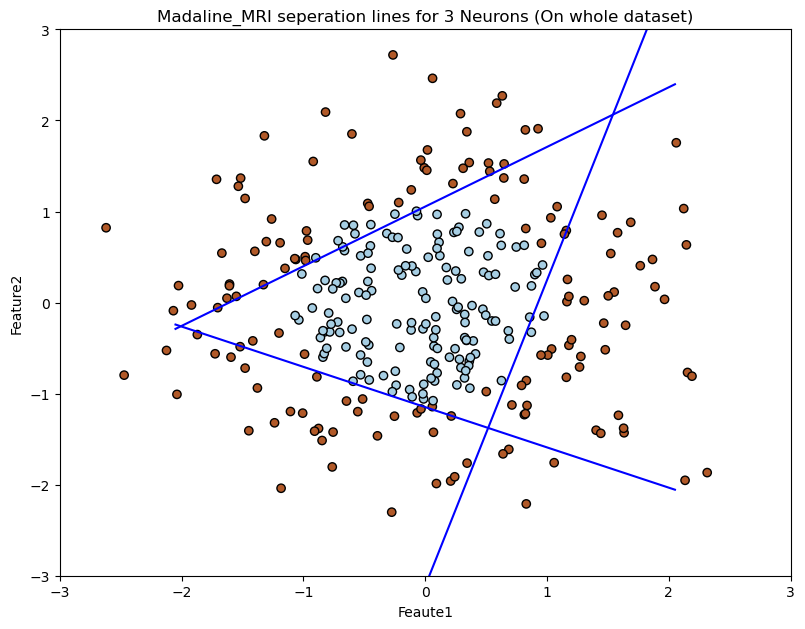

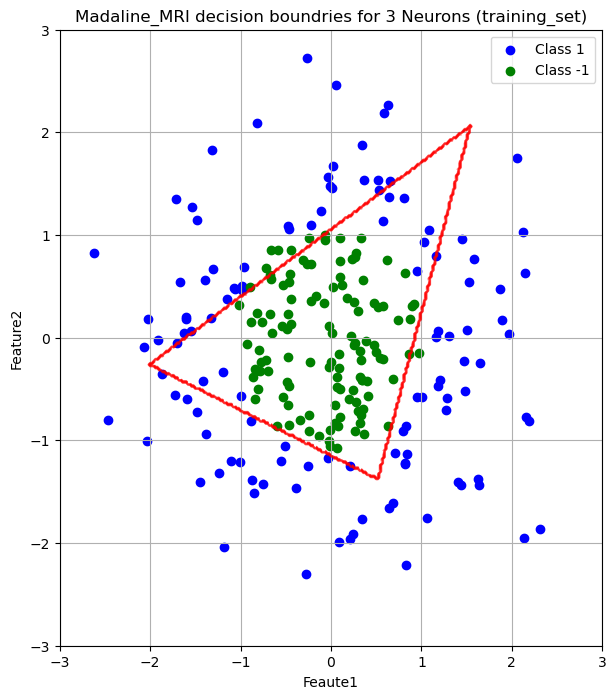

In [369]:
plot_adaline_seperators(X, y,  models[3])
decision_boundries(X_train, y_train, models[3])

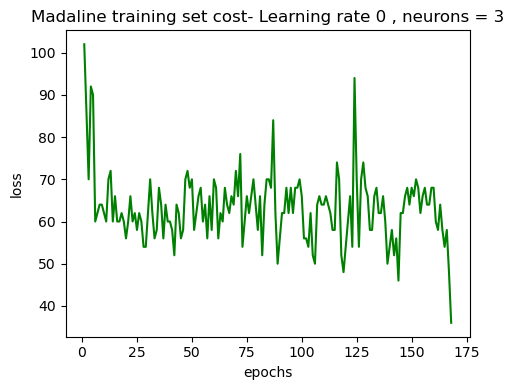

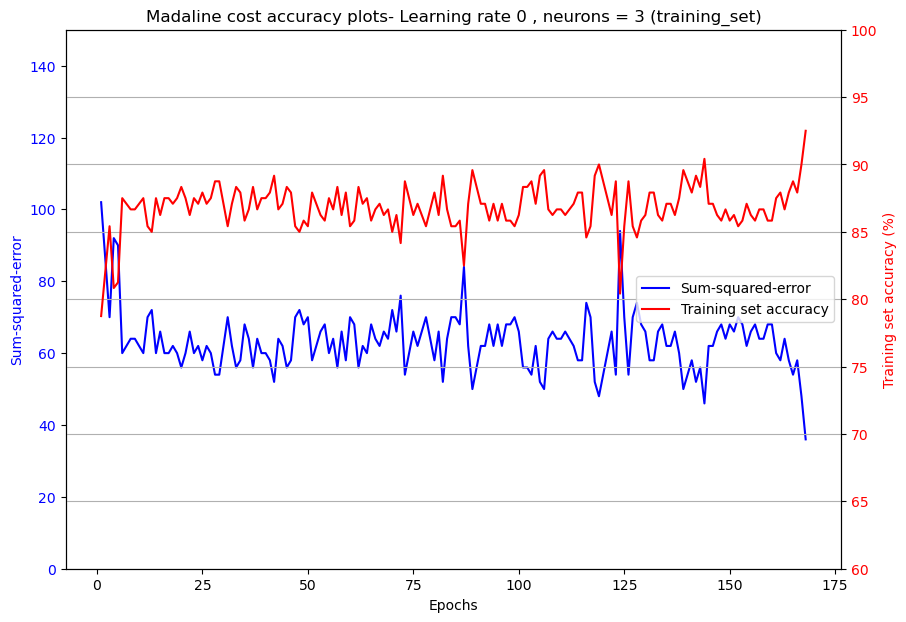

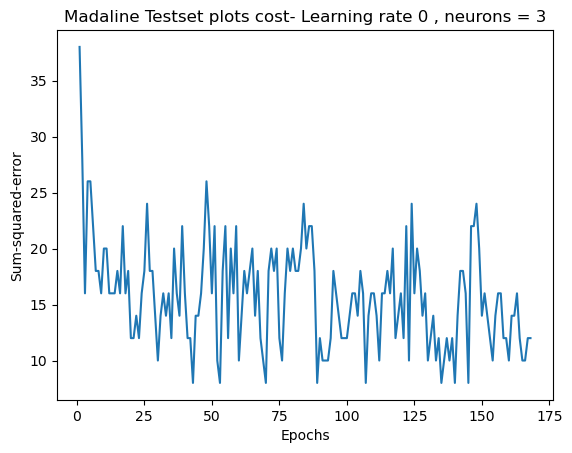

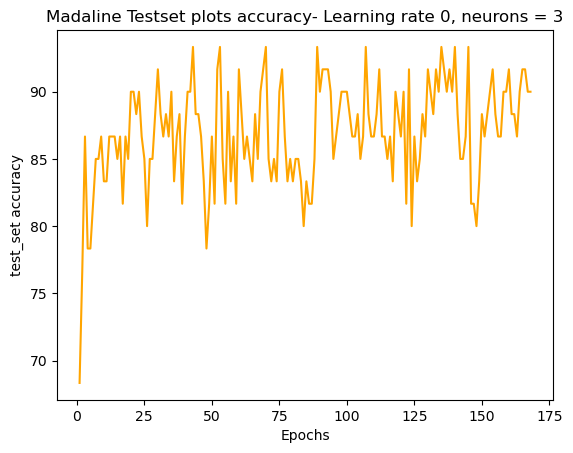

In [370]:
plot_loss(models[3])
cost_accuracy_plot(models[3])
test_cost_accuracy_plts(models[3])

In [371]:
neurons=3
print('Trainset accuracy of madaline with %i neurons are = '%(models[neurons].neurons_number) ,models[neurons].accuracy[-1] )

Trainset accuracy of madaline with 3 neurons are =  92.5


# loss-accuracy-boundries for 5 hidden units

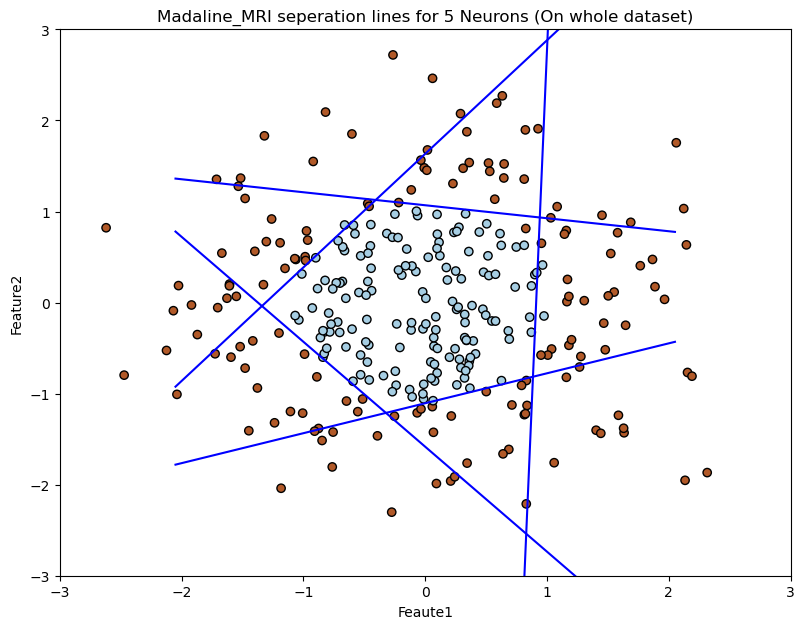

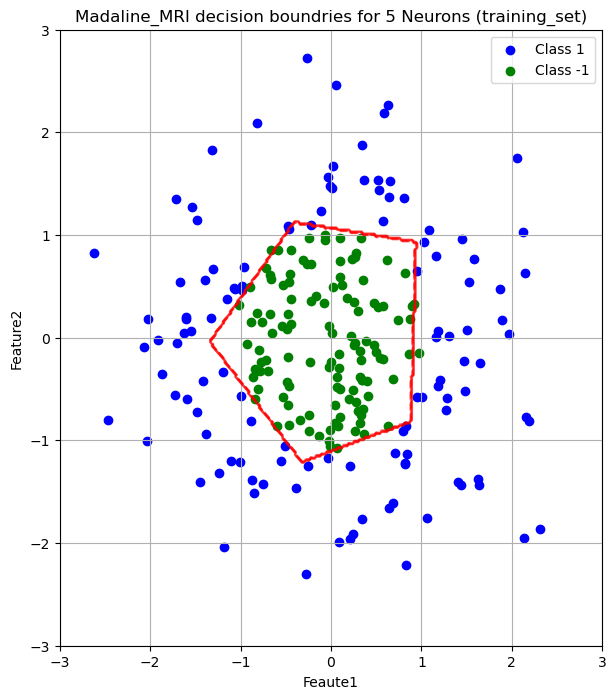

In [372]:
plot_adaline_seperators(X, y,  models[5])
decision_boundries(X_train, y_train, models[5])

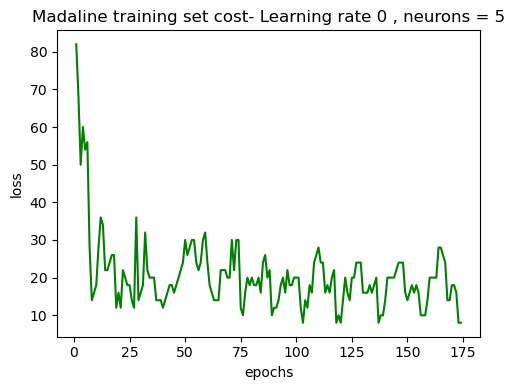

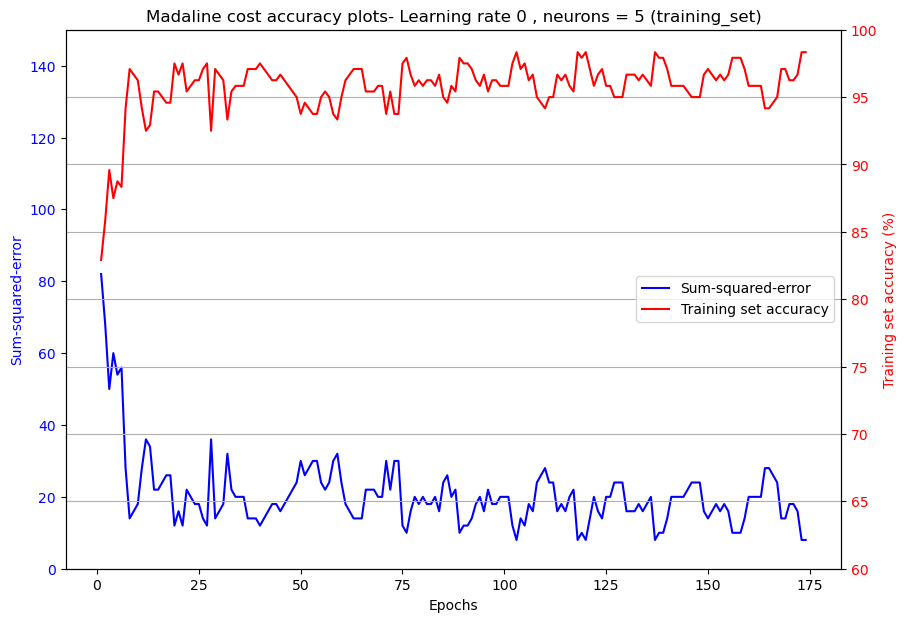

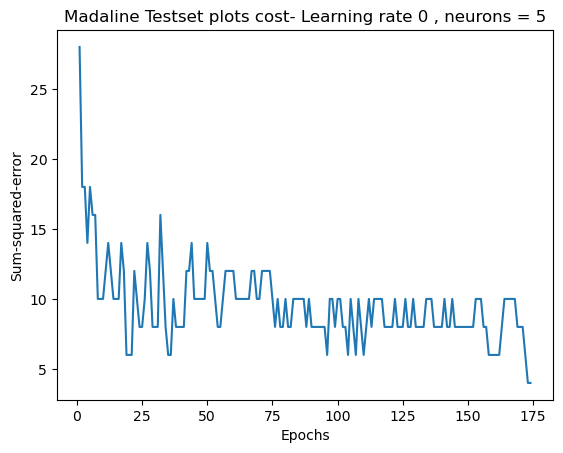

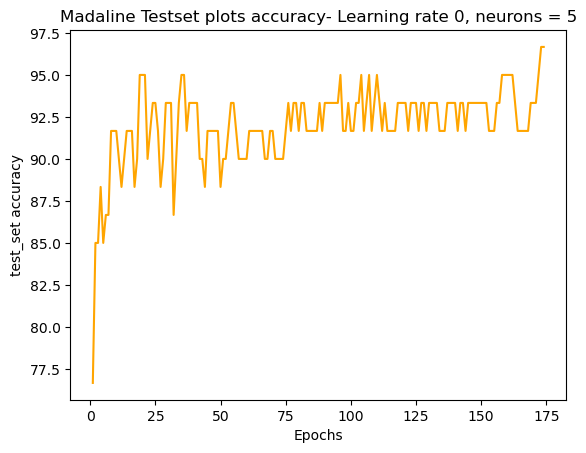

In [373]:
plot_loss(models[5])
cost_accuracy_plot(models[5])
test_cost_accuracy_plts(models[5])


In [374]:
neurons=5
print('Trainset accuracy of madaline with %i neurons are = '%(models[neurons].neurons_number) ,models[neurons].accuracy[-1] )

Trainset accuracy of madaline with 5 neurons are =  98.33333333333333


# At last we evaluate our algorithm for 8 neurons


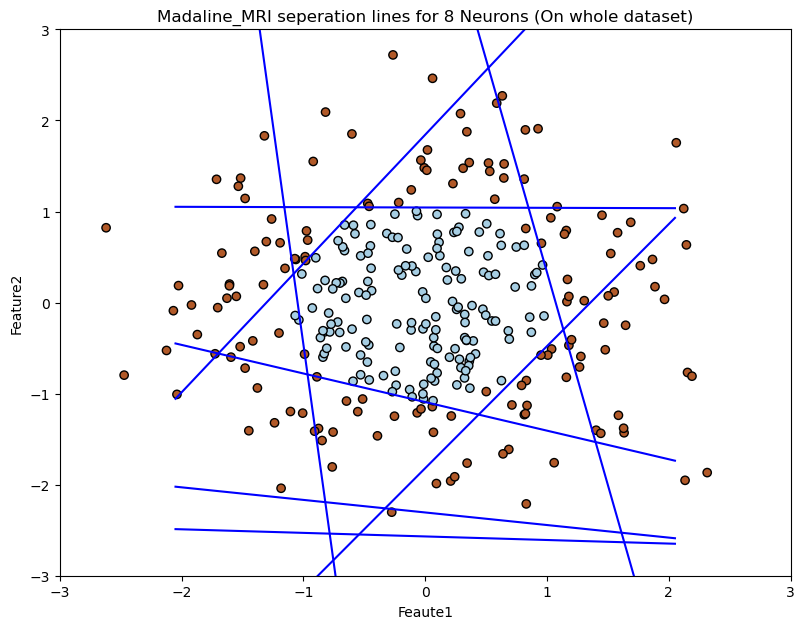

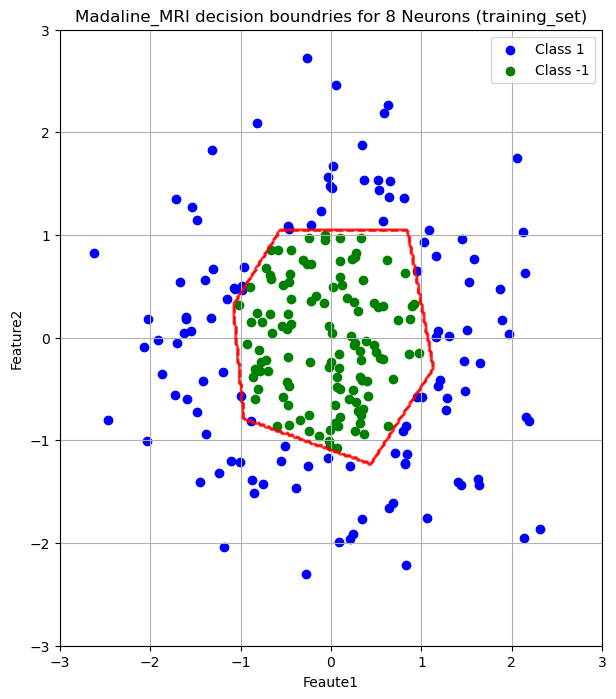

In [375]:
plot_adaline_seperators(X, y,  models[8])
decision_boundries(X_train, y_train, models[8])

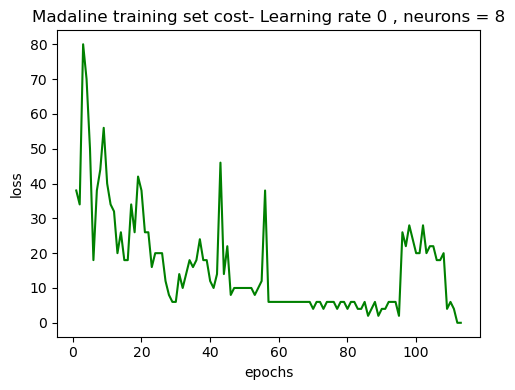

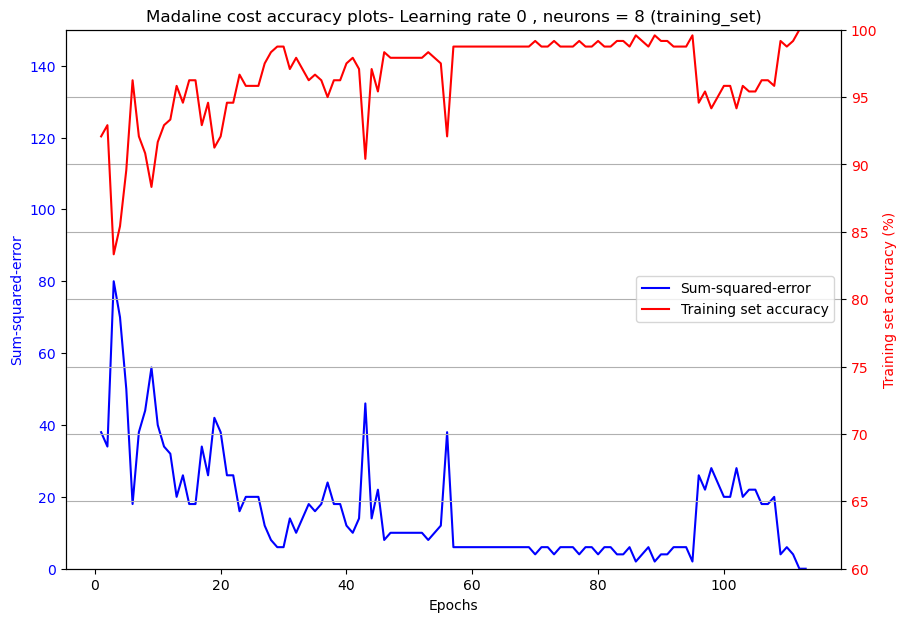

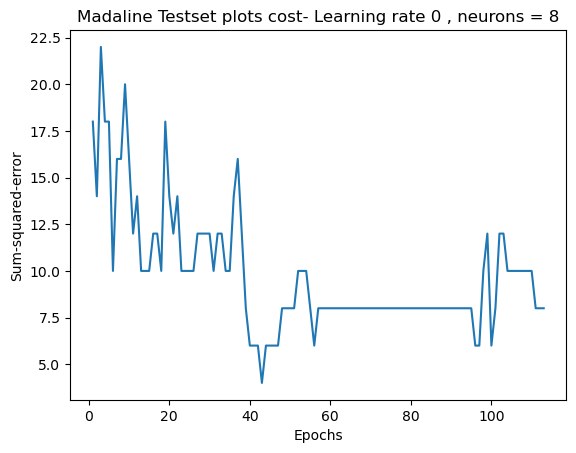

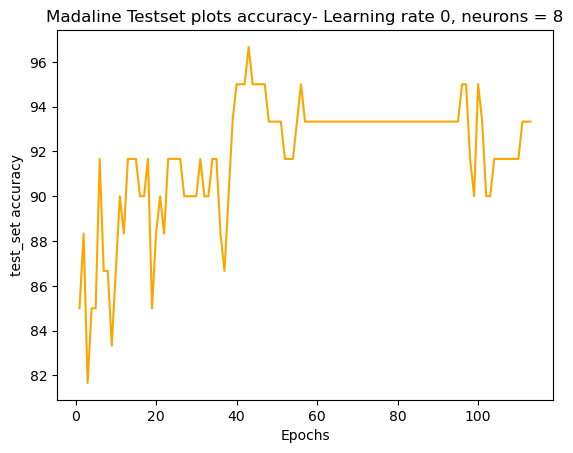

In [376]:
plot_loss(models[8])
cost_accuracy_plot(models[8])
test_cost_accuracy_plts(models[8])

In [377]:
neurons=8
print('Trainset accuracy of madaline with %i neurons are = '%(models[neurons].neurons_number) ,models[neurons].accuracy[-1] )

Trainset accuracy of madaline with 8 neurons are =  100.0
